In [1]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import Reader
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_excel("C:\\Users\\shane\\rec\\Raw.xlsx")
df.head()

,CustomerName,UserID,Item,ItemID,ItemDescription,Qty
0,AIRGAS SOUTH / GASO01,1,TH 80 02,1,WEAR HARD 1/8,10.0
1,AIRGAS SOUTH / GASO01,1,TE SUPER 500 03,2,SUPER 500 5/32,10.0
2,AIRGAS SOUTH / GASO01,1,TE SUPER 500 02,3,SUPER 500 1/8,10.0
3,AIRGAS SOUTH / GASO01,1,TF 630-16 02,4,E630-16 1/8 (17-4 PH),10.0
4,AIRGAS SOUTH / GASO01,1,TCU AB/06,5,"ALUMINUM BRONZE A2 1/8 X 36"" (ERCUAL-A2)",10.0


In [4]:
print("The number of unique item is: ", len(df.Item.unique()))

The number of unique item is:  2558


In [5]:
print("The number of customer is: ", len(df.CustomerName.unique()))

The number of customer is:  649


### Best selling item

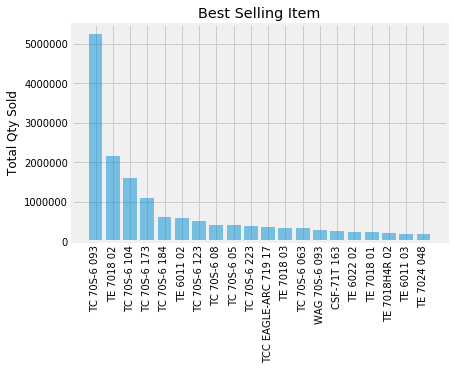

In [6]:
popular_item = df[['Item','Qty']].groupby('Item').sum().reset_index()
popular_item = popular_item.sort_values('Qty', ascending=False).head(n=20)
# popular_item

objects = (list(popular_item['Item']))
y_pos = np.arange(len(objects))
performance = list(popular_item['Qty'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Total Qty Sold')
plt.title('Best Selling Item')
 
plt.show()

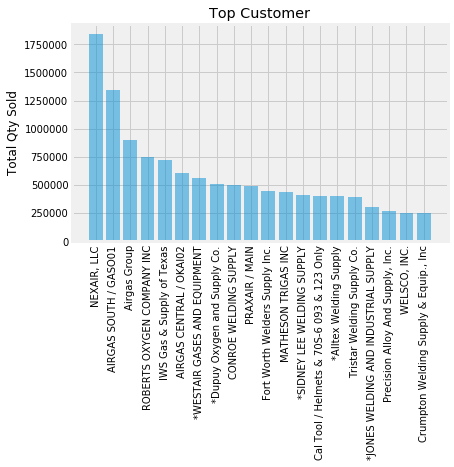

In [7]:
popular_customer = df[['CustomerName','Qty']].groupby('CustomerName').sum().reset_index()
popular_customer = popular_customer.sort_values('Qty', ascending=False).head(n=20)
# popular_customer

objects = (list(popular_customer['CustomerName']))
y_pos = np.arange(len(objects))
performance = list(popular_customer['Qty'])
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Total Qty Sold')
plt.title('Top Customer')
 
plt.show()

In [5]:
# Normalization
df['Qty'] = (df['Qty']-df['Qty'].mean())/df['Qty'].std()
df.head()

#df[['Qty']] = MinMaxScaler().fit_transform(df[['Qty']])
#df.head()

,CustomerName,UserID,Item,ItemID,ItemDescription,Qty
0,AIRGAS SOUTH / GASO01,1,TH 80 02,1,WEAR HARD 1/8,-0.114944
1,AIRGAS SOUTH / GASO01,1,TE SUPER 500 03,2,SUPER 500 5/32,-0.114944
2,AIRGAS SOUTH / GASO01,1,TE SUPER 500 02,3,SUPER 500 1/8,-0.114944
3,AIRGAS SOUTH / GASO01,1,TF 630-16 02,4,E630-16 1/8 (17-4 PH),-0.114944
4,AIRGAS SOUTH / GASO01,1,TCU AB/06,5,"ALUMINUM BRONZE A2 1/8 X 36"" (ERCUAL-A2)",-0.114944


In [6]:
# Outlier
outlier_benchmark = round(df['Qty'].quantile(0.7),0)
outlier_itemID = list(df[df['Qty'] < outlier_benchmark]["ItemID"])

In [7]:
reader = Reader()
algo = SVD()

data = Dataset.load_from_df(df[['UserID', 'ItemID', 'Qty']], reader)

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2455  1.2825  1.2502  1.3883  1.6533  1.3640  0.1536  
MAE (testset)     1.1087  1.1135  1.1104  1.1137  1.1382  1.1169  0.0108  
Fit time          1.27    1.32    1.32    1.29    1.29    1.30    0.02    
Test time         0.03    0.04    0.04    0.03    0.03    0.04    0.00    


{'test_rmse': array([1.24551143, 1.28254366, 1.25016417, 1.38834616, 1.65331013]),
 'test_mae': array([1.10873471, 1.11351053, 1.11041197, 1.11374176, 1.13817767]),
 'fit_time': (1.2706429958343506,
  1.3154962062835693,
  1.3244898319244385,
  1.291154146194458,
  1.2925922870635986),
 'test_time': (0.03390908241271973,
  0.03989362716674805,
  0.04088926315307617,
  0.03191494941711426,
  0.03194451332092285)}

In [32]:
# Purchased in the past
past_ByUser = df[df['UserID'] == 10]
past_ByUser.sort_values(by=['Qty'], ascending=False, inplace=True)

# List of prevously purchased Item ID 
col_past = list(past_ByUser['ItemID'])

past_ByUser[:10]

C:\Users\shane\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CustomerName,UserID,Item,ItemID,ItemDescription,Qty
25273,JOHNS SALES & SERVICE INC.,10,TC 70S-6 104,2244,ER70S-6 .035 X 44 LB SPOOL,6.123417
24706,JOHNS SALES & SERVICE INC.,10,TC 70S-6 184,2277,ER70S-6 .045 X 44 LB SPOOL,2.085931
21092,JOHNS SALES & SERVICE INC.,10,TCC EAGLE-ARC 719 17,2245,"E71T-1C/1M, 9C/9M H8 .045 X 44 LB SPOOL",1.535365
21090,JOHNS SALES & SERVICE INC.,10,TE 7024 048,1995,"E7024 3/16 X 18"" (50 LB MASTER CTN)",1.273985
28145,JOHNS SALES & SERVICE INC.,10,TE 7018 02,391,E7018 1/8,1.076560
21667,JOHNS SALES & SERVICE INC.,10,TE 7024 038,1922,"E7024 5/32 X 18"" (50 LB MASTER CTN)",0.870792
25177,JOHNS SALES & SERVICE INC.,10,TE 7018 03,1017,E7018 5/32,0.826302
21932,JOHNS SALES & SERVICE INC.,10,TE 7018 02P,993,"1/8""",0.717857
21668,JOHNS SALES & SERVICE INC.,10,TE 7024 03,776,E7024 5/32,0.400865
24752,JOHNS SALES & SERVICE INC.,10,TE 7018 01,766,E7018 3/32,0.300762


In [46]:
def past_itemID(userid):
    past_ByUser = df[df['UserID'] == userid]
    col_past2 = list(past_ByUser['ItemID'])
    return col_past2

user10_past = past_itemID(10)

In [47]:
# Training the dataset
trainset = data.build_full_trainset()
algo.fit(trainset)

# Predicting
testset = df.copy()
testset['Estimate_Score'] = testset['ItemID'].apply(lambda x: algo.predict(1, x).est)

# Dropping what customer has already purchased
testset = testset[~testset['ItemID'].isin(user10_past)]

# Dropping unnecessary columns
testset = testset.drop(['ItemID','UserID', 'CustomerName', 'Qty'], axis = 1)

# Dropping the duplicate item
testset = testset.drop_duplicates(subset=['Item'])

# Dropping the score of 1
testset = testset[testset['Estimate_Score'] != 1]

# Sort by a score
testset = testset.sort_values('Estimate_Score', ascending=False)

#print(testset["Estimate_Score"].value_counts())
testset

,Item,ItemDescription,Estimate_Score
25461,WAG 70S-6 093,".035"" X 33 LBS Spool ER70S-6 (WAG W70S6035X33)",5.000000
10504,TC 70S-6 173,ER70S-6 .045 X 33 LB SPOOL,5.000000
10089,TC 70S-6 093,ER70S-6 .035 X 33 LB SPOOL,5.000000
20743,TC 70S-6 123,ER70S-6 .035 X 550 LB PAIL PACK,4.575105
20341,TC 70S-6 223,ER70S-6 .045 X 550 LB PAIL PACK,3.450419
22467,TCB BW 799 26,"BW 799 1/16 X 500 LB DRUM E71T-1C/1M,9C/9M H8 ...",3.415428
21243,TE 7024-1 048,"3/16 X 18"" E7024-1 (50 LB MASTER CTN)",2.986175
21862,TCB BW 799 17,"BW 799 .045 X 44LB E71T-1C/1M,9C/9M H8 LOW FUME",2.850400
10225,CSF-71T 23,E71T-1C/1M .052 X 33 LB SPOOL BAKED,2.408600
1370,TE 7018H4R 02,E7018H4R 1/8 (METAL CAN),2.394495


In [ ]:
# for id in numpy.unique(station_id):


In [ ]:
# benchmark = round(df['Qty'].quantile(0.7),0)
# drop_item_list = df[df['Qty'] < benchmark].index

# User_NotPurchased = User_NotPurchased.copy()
# User_NotPurchased = User_NotPurchased.reset_index()
# User_NotPurchased = User_NotPurchased[~User_NotPurchased['ItemID'].isin(drop_item_list)]